#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [ ]:
first_name= "mohammad"
last_name= "ghafourian"
student_number= "99106493"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [ ]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


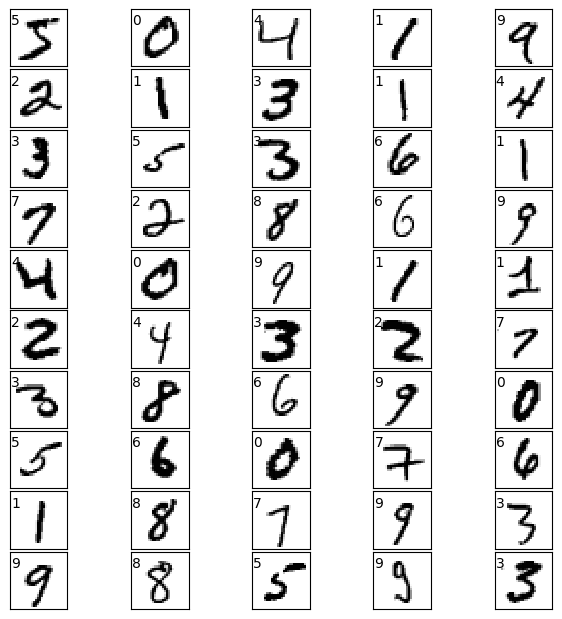

In [ ]:
# here show 50 first of this images
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

def show_images(num_images,X,Y):
    for i in range(num_images):
        ax = fig.add_subplot(10, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
        ax.text(0, 7, str(Y[i]))
show_images(50,X_train,y_train)

In [ ]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
X_train = X_train.reshape(60000, 784)/255
X_test = X_test.reshape(10000, 784)/255



در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [ ]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
xhat_train=X_train-np.mean(X_train)
covtrainMatrix = np.matmul(xhat_train.T ,xhat_train) # matrix multiplication in numpy
val,vec=eig(covtrainMatrix)

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [ ]:
explained_variance = 0.7 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO
# sort the eigenvalues and eigenvectors in descending order
idx = np.argsort(val)[::-1]
val = val[idx]
vec = vec[:,idx]

# calculate the cumulative sum of the sorted eigenvalues
cumulative_sum = np.cumsum(val)
total_variance = cumulative_sum[-1]

# find the number of components that contain the desired explained variance
k = np.argmax(cumulative_sum >= explained_variance * total_variance) + 1
print("Number of components:", k)
print("Explained variance:", cumulative_sum[k-1] / total_variance)

# calculate the compression ratio
compression_ratio = X_train.shape[1] / k
print("Compression ratio:", compression_ratio)


#calculate the compression_ratio

Number of components: 16
Explained variance: (0.7046142028389493+0j)
Compression ratio: 49.0


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

---



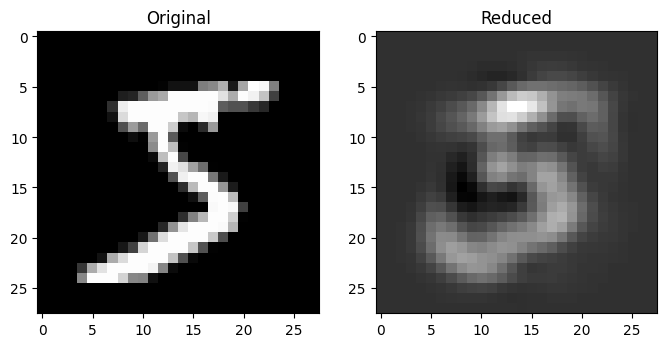

In [ ]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
F = X_train.dot(vec[:,:k])
X_k = F.dot(vec[:,:k].T)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image
sample_index = 0
sample_original = X_train[sample_index,:].reshape(28,28)
sample_reduced = np.real(X_k[sample_index,:]).reshape(28,28)
#TODO
#plot the dimentionally reduced data
#plot the original data
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(sample_original, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(sample_reduced, cmap='gray')
ax[1].set_title('Reduced')
plt.show()

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .




In [ ]:
#complete below function using python PCA function
def do_pca(n_components, data):
    pca = PCA(n_components=n_components)
    projected_data = pca.fit_transform(data)
    return projected_data

In [ ]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X, y)
    acc = clf.score(X, y)
    if print_output:
        print(f"Accuracy: {acc:.4f}")
    return acc

In [ ]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
acc_list, pc_list = [], []
for pc in range(2,101):
    X_train_pca = do_pca(pc, X_train.reshape(-1, 784))
    acc = ML_model(X_train_pca, y_train, print_output=False)
    acc_list.append(acc)
    pc_list.append(pc)

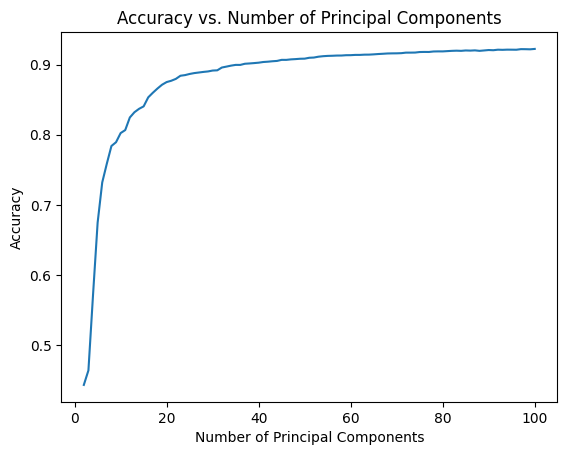

In [ ]:
#plot the accuracy based on components.
#TODO
plt.plot(pc_list, acc_list)
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Principal Components")
plt.show()

In [ ]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
max_acc = max(acc_list)
max_pc = pc_list[acc_list.index(max_acc)]
print(f"Max Accuracy: {max_acc:.4f} with {max_pc} principal components")

Max Accuracy: 0.9224 with 100 principal components
